In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt
import pandas as pd

**SORU 1**


In [ ]:

#Mavi noktalar sonra pembe noktalar olacak şekilde sıralanmıştır.
#orjinden başlayarak aşağıdan yukarıya doğru sıra ile
coord_2B = np.array([
    [337, 480],
    [341, 390],
    [374, 443],
    [383, 343],
    [412, 500],
    [419, 399],
    [425, 344],
    [461, 460],
    [468, 404],
    [473, 344],
    [273, 449],
    [272, 405],
    [274, 357],
    [238, 407],
    [238, 357],
    [237, 303],
    [199, 461],
    [196, 357],
    [152, 415],
    [146, 296]])

for i in range(len(coord_2B)):
    coord_2B[i][0] -= 42
    coord_2B[i][1] -= 110
#command+shift+4 ile tüm bilgisayar ekranının sol üstüne göre 2D koordinatlarını aldım.
#çıkarma işlemi tüm bilgisayar ekranına göre değil de resme göre sol üst orjin alınması içindir.

coord_3B = np.array([[0, 49, 59],
                   [0, 49, 139],
                   [0, 89, 99],
                   [0, 89, 179],
                   [0, 129, 59],
                   [0, 129, 139],
                   [0, 129, 179],
                   [0, 169, 99],
                   [0, 169, 139],
                   [0, 169, 179],
                   [40, 0, 84],
                   [40, 0, 124],
                   [40, 0, 164],
                   [80, 0, 124],
                   [80, 0, 164],
                   [80, 0, 244],
                   [120, 0, 84],
                   [120, 0, 164],
                   [160, 0, 124],
                   [160, 0, 244]])

In [ ]:
A = []
b = []
for i in range(20):
    x, y = coord_2B[i]
    X, Y, Z = coord_3B[i]
    A.append([X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x])
    A.append([0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y])


U, S, V = np.linalg.svd(A, full_matrices=True)
M = V[:,-1]
M = np.reshape(M,(3, 4))
M


array([[ 5.84659185e-03,  1.59649892e-03,  2.76821045e-03,
        -5.93284869e-02],
       [-9.93013824e-01,  3.19778404e-02,  6.68271753e-02,
        -6.72804003e-02],
       [-1.16045171e-02,  1.43150673e-02,  5.79375570e-04,
         2.06272053e-03]])

In [ ]:
# Daha önce kullanılmayan 5 koordinat bilgisi için
coord_3B_new = np.array([[0, 49, 99, 1],
                   [0, 49, 179, 1],
                   [0, 89, 59, 1],
                   [0, 89, 139, 1],
                   [0, 129, 99, 1],
                   [40, 0, 244, 1],
                   [80, 0, 84, 1],
                   [120, 0, 124, 1],
                   [120, 0, 244, 1],
                   [160, 0, 84, 1]])

coord_3B_new = np.transpose(coord_3B_new)
coord_2B_new = M.dot(coord_3B_new)
coord_2B_new


array([[   0.29295279,    0.51440963,    0.24608433,    0.46754117,
           0.42067271,    0.84997854,    0.64092854,    0.98552063,
           1.31770588,    1.10865589],
       [   8.11552413,   13.46169816,    6.72155074,   12.06772476,
          10.67375136,  -23.48200257,  -73.89490356, -110.94236949,
        -102.92310846, -153.33600945],
       [   0.7608592 ,    0.80720924,    1.31028687,    1.35663691,
           1.90606458,   -0.32075032,   -0.8776311 ,   -1.31863676,
          -1.24911169,   -1.80599246]])

In [ ]:
# Manuel hesaplanan 5 yeni nokta için gerçek 2B koordinatlar koordinatlar
matris = [
    [338, 437],
    [344, 347],
    [371, 490],
    [373, 395],
    [414, 449],
    [274, 308],
    [239, 455],
    [199, 412],
    [195, 301],
    [152, 470]
]

for i in range(len(matris)):
    matris[i][0] -= 42
    matris[i][1] -= 110

matris1 = coord_2B_new[:-1] / coord_2B_new[2]
matris2 = np.transpose(matris)
matris2

fark_matrisi = matris1- matris2
hata_matrisi = np.abs(fark_matrisi)
ortalama_hata_orani = np.mean(hata_matrisi)

print("İki matris arasındaki ortalama hata oranı:", ortalama_hata_orani)


İki matris arasındaki ortalama hata oranı: 249.56049556184044


In [ ]:
# 1-11 arası adımları 40 koordinat ile tekrarlama
coord_repeat_3B = [
    [0,49,59],
    [0,49,99],
    [0,49,139],
    [0,49,179],
    [0,49,219],
    [0,89,59],
    [0,89,99],
    [0,89,139],
    [0,89,179],
    [0,89,219],
    [0,129,59],
    [0,129,99],
    [0,129,139],
    [0,129,179],
    [0,129,219],
    [0,169,59],
    [0,169,99],
    [0,169,139],
    [0,169,179],
    [0,169,219],
    [40,0,84],
    [40,0,124],
    [40,0,164],
    [40,0,244],
    [40,0,284],
    [80,0,84],
    [80,0,124],
    [80,0,164],
    [80,0,244],
    [80,0,284],
    [120,0,84],
    [120,0,124],
    [120,0,164],
    [120,0,244],
    [120,0,284],
    [160,0,84],
    [160,0,124],
    [160,0,164],
    [160,0,244],
    [160,0,284]
]

coord_repeat_2B = [
    [337,480],
    [339,439],
    [341,390],
    [344,345],
    [346,299],
    [373,393],
    [375,446],
    [379,396],
    [382,345],
    [385,295],
    [414,504],
    [416,454],
    [421,401],
    [426,346],
    [430,294],
    [460,516],
    [463,463],
    [469,406],
    [474,346],
    [481,291],
    [273,451],
    [273,407],
    [273,359],
    [275,310],
    [273,259],
    [239,458],
    [239,411],
    [238,360],
    [238,305],
    [236,252],
    [199,464],
    [199,413],
    [196,353],
    [195,303],
    [194,244],
    [152,473],
    [151,417],
    [149,459],
    [145,298],
    [141,234]
]

for i in range(len(coord_repeat_2B)):
    coord_repeat_2B[i][0] -= 42
    coord_repeat_2B[i][1] -= 110


A = []
b = []
for i in range(20):
    x, y = coord_repeat_2B[i]
    X, Y, Z = coord_repeat_3B[i]
    A.append([X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x])
    A.append([0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y])


U, S, V = np.linalg.svd(A, full_matrices=True)
M = V[:,-1]
M = np.reshape(M,(3, 4))

In [ ]:
# Daha önce kullanılmayan 5 koordinat bilgisi için
coord_repeat_3B_new = np.array([[0, 9, 59, 1],
                   [0, 9, 99, 1],
                   [0, 9, 139, 1],
                   [0, 9, 179, 1],
                   [0, 9, 219, 1],
                   [0, 0, 84, 1],
                   [0, 0, 124, 1],
                   [0, 0, 164, 1],
                   [0, 0, 244, 1],
                   [0, 0, 284, 1]])

coord_repeat_3B_new = np.transpose(coord_repeat_3B_new)
coord_repeat_2B_new = M.dot(coord_repeat_3B_new)

matris_repeat = [
    [306, 475],
    [308, 434],
    [309, 390],
    [312, 343],
    [313, 301],
    [303, 347],
    [304, 404],
    [306, 360],
    [306, 312],
    [306, 365]
]


for i in range(len(matris_repeat)):
    matris_repeat[i][0] -= 42
    matris_repeat[i][1] -= 110

matris1_r = coord_repeat_2B_new[:-1] / coord_repeat_2B_new[2]
matris2_r = np.transpose(matris_repeat)

fark_matrisi_r = matris1_r - matris2_r
hata_matrisi_r = np.abs(fark_matrisi_r)
ortalama_hata_orani_r = np.mean(hata_matrisi_r)

print("İki matris arasındaki ortalama hata oranı:", ortalama_hata_orani_r)

İki matris arasındaki ortalama hata oranı: 1.622127801061044e+17


Koordinat sayısını arttırdıkça hata oranının düştüğü görülmektedir. Kamera kalibrasyonu işlemi, kameranın görüş alanındaki nesnelerin konumlarını ve kameranın çektiği görüntülerdeki piksel koordinatlarını ilişkilendirmeyi amaçlar. Bu işlem sırasında sırasında daha fazla nesnenin lokasyon bilgisi kullanarak daha doğru bir matris oluşturabiliriz. Bu, kameranın ölçeklenmesi ve konumlandırılmasıyla ilgili hataların azalacağına ve kalibrasyon işleminin daha doğru olacağı anlamına gelir.

**SORU 2**

In [ ]:
img = cv2.imread('lena_grayscale_hq.jpg', 0)
# cv kütüphanesi sadece resim okumak ve göstermek için kullanılacaktır.

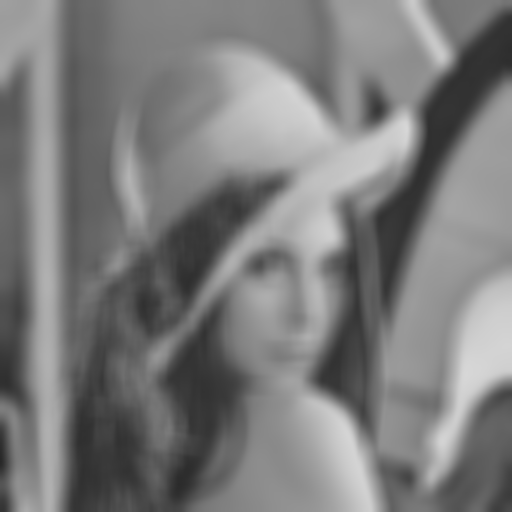

In [ ]:
# BOX FILTER
filter_size = 21
padding_size = filter_size//2
pad_img = np.pad(img, padding_size, mode='symmetric')
m,n = pad_img.shape
new_img = np.zeros([m, n])

for i in range(int(padding_size), int(m - padding_size)):
    for j in range(int(padding_size), int(n - padding_size)):
        new_img[i, j] = np.sum(pad_img[int(i-padding_size):int(i+1+padding_size),
                              int(j-padding_size):int(j+1+padding_size)]) / (filter_size * filter_size)

new_img = new_img.astype(np.uint8)
cv2_imshow(new_img[10:-10,10:-10])

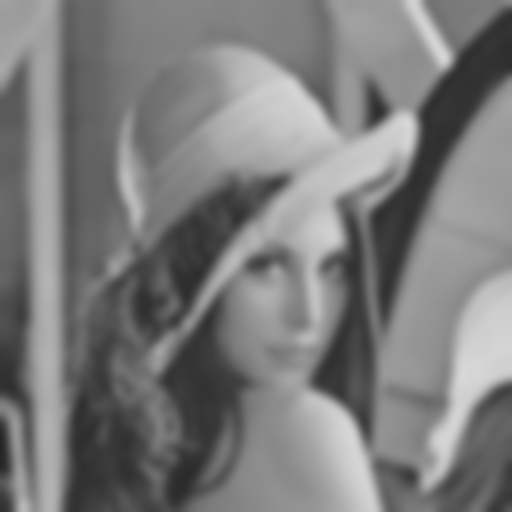

In [ ]:
#GAUSSIAN FILTER
sigma = 5
kernel = np.zeros((21,21))
m, n = img.shape
pad = 21 // 2

for i in range(21):
    for j in range(21):
        x = i - pad
        y = j - pad
        kernel[i, j] = (np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))) / (2*math.pi*sigma*sigma)
kernel /= kernel.sum()

pad_img = np.pad(img, int(pad), mode='symmetric')
filtered_img = np.zeros_like(img)
for i in range(m):
    for j in range(n):
        filtered_img[i, j] = np.sum(pad_img[i:i+21, j:j+21] * kernel)

filtered_img = filtered_img.astype(np.uint8)
cv2_imshow(filtered_img)

Box Filter, bir pikselin değerini, o pikselin ve etrafındaki piksellerin ortalaması ile değiştirir. Bu sebeple kenar ve detay kaybına sebebiyet verir.
Gaus Filtersi gürültüyü azaltırken görüntüdeki kenarları ve ayrıntıları gaus fonkisyonu kullanara korur ve daha seçici bir blurlama sağlar. Bu sebeple, gauss filtresinin çıktısı, box filtreye kıyasla daha pürüzsüz ve daha doğal görünen bir sonuca sahiptir. Yukarıda görülen iki resimde de bu fark net bir şekilde belli olmaktadır.

**SORU 3**

In [ ]:

soru3 = cv2.resize(img, (100,100))
cv2.imwrite("Soru3.png", soru3)

True

In [ ]:
# A şıkkı
soru3_img = cv2.imread("Soru3.png",0)
pixel_values = soru3_img.flatten()
pixel_values.sort()
print(pixel_values.tolist())

[27, 28, 29, 29, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,

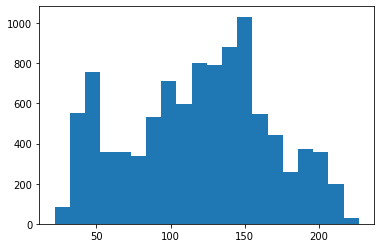

In [ ]:
# B şıkkı
hist, bins = np.histogram(soru3_img, bins=20)
plt.bar(bins[:-1], hist, width=bins[1]-bins[0])
plt.show()

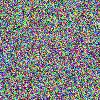

In [ ]:
# C şıkkı
# Yeni renkli resim oluşturun dendiği için random oluşturulmuş renkli bir görüntü oluşturuyorum.
c_image = np.zeros((100, 100, 3), dtype=np.uint8)
for i in range(100):
    for j in range(100):
        c_image[i, j, 0] = np.random.randint(0, 256)
        c_image[i, j, 1] = np.random.randint(0, 256)
        c_image[i, j, 2] = np.random.randint(0, 256)
cv2.imwrite("ColorImage.png", c_image)
c_img = cv2.imread("ColorImage.png")
cv2_imshow(c_img)


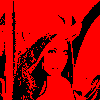

In [ ]:
#C şıkkı devamı
thold = 92
m,n = soru3_img.shape
for i in range(m):
    for j in range(n):
        if soru3_img[i, j] > thold:
            c_img[i, j] = [0, 0, 255]
        else:
            c_img[i, j] = [0, 0, 0]


cv2_imshow(c_img)

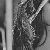

In [ ]:
# D şıkkı
x1 = 0
y1 = m // 2
x2 = n // 2
y2 = m

lower_left_quadrant = soru3_img[y1:y2, x1:x2]
cv2_imshow(lower_left_quadrant)

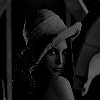

In [ ]:
# E şıkkı
new_img = np.zeros_like(soru3_img)
avg = np.mean(soru3_img)
new_img = soru3_img - avg
cv2_imshow(new_img)